In [1]:
import retro
import torch
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import torch.nn.functional as F

def environment_make():
    global environment
    if globals().get('environment'):
        environment.render(close=True)
        environment.close()

    environment = retro.make(game='SuperMarioBros-Nes')
    
    return environment

In [ ]:
mean
max_
difference
frequency
variance
reverse tree eg autoenc

In [2]:
import pyspark
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [3]:
spark = (pyspark.sql.SparkSession
         .builder
         .master('local[8]')
         .appName('lecture')
         .getOrCreate())

sc = spark.sparkContext

In [2]:
actions = {
    'Left':      [0, 0, 0, 0, 0, 0, 1, 0, 0],
    'Right':     [0, 0, 0, 0, 0, 0, 0, 1, 0],
    'Jump':      [0, 0, 0, 0, 0, 0, 0, 0, 1],
    'None':      [0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Crouch':    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    # 'Dash':      [0, 0, 1, 0, 0, 0, 0, 0, 0],
    # 'RightDash': [0, 0, 1, 0, 0, 0, 0, 1, 0],
    'LeftJump':  [0, 0, 0, 0, 0, 0, 1, 0, 1],
    'RightJump': [0, 0, 0, 0, 0, 0, 0, 1, 1]
}

actions = list(actions.values())

# investigate 150sec vs 152sec



---
### enchiridion

In [295]:
torch.tensor(f[:,:,0]).unsqueeze(0).shape

torch.Size([1, 224, 240])

In [296]:
f * f

array([[[ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64],
        ...,
        [ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64]],

       [[ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64],
        ...,
        [ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64]],

       [[ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64],
        ...,
        [ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64]],

       ...,

       [[ 64, 144,  64],
        [  0,   0,   0],
        [ 64, 144,  64],
        ...,
        [ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64]],

       [[ 64, 144,  64],
        [  0,   0,   0],
        [ 64,  16,   0],
        ...,
        [ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64]],

       [[ 64, 144,  64],
        [  0,   0,   0],
        [ 64,  16,   0],
        ...,
        [ 64, 144,  64],
        [ 64, 144,  64],
        [ 64, 144,  64]]

In [9]:
asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3
asymmetric = asymmetric.numpy()

# asymmetric = np.array([[1, 2], [10, 12]])

a1 = asymmetric.reshape(16, 16, 3)[:, :, 0]
a2 = asymmetric.reshape(16, 16, 3)[:, :, 1]
a3 = asymmetric.reshape(16, 16, 3)[:, :, 2]
a1 = np.block([[a1]*15]*14)
a2 = np.block([[a2]*15]*14)
a3 = np.block([[a3]*15]*14)

t = np.zeros(a1.shape + (3,))
t[:, :, 0] = a1
t[:, :, 1] = a2
t[:, :, 2] = a3

asymmetric_matrix = t

asymmetric_matrix.shape

(224, 240, 3)

In [400]:
~.~

SyntaxError: invalid syntax (<ipython-input-400-ea6846a03edf>, line 1)

In [33]:
asymmetric

array([0.125     , 0.12598039, 0.1269659 , 0.1279565 , 0.12895228,
       0.12995319, 0.13095929, 0.13197057, 0.13298702, 0.1340087 ,
       0.13503559, 0.13606767, 0.13710503, 0.13814765, 0.13919556,
       0.14024875, 0.14130719, 0.14237098, 0.14344011, 0.14451452,
       0.14559434, 0.1466795 , 0.14777008, 0.14886603, 0.14996739,
       0.15107416, 0.15218636, 0.15330397, 0.15442707, 0.15555565,
       0.15668973, 0.1578293 , 0.15897432, 0.16012493, 0.16128106,
       0.16244271, 0.16360997, 0.1647828 , 0.16596124, 0.16714527,
       0.16833492, 0.1695302 , 0.17073113, 0.17193766, 0.17314991,
       0.17436786, 0.1755915 , 0.17682086, 0.17805587, 0.17929669,
       0.18054324, 0.18179552, 0.18305363, 0.18431753, 0.18558723,
       0.18686275, 0.18814409, 0.18943128, 0.19072434, 0.19202322,
       0.19332801, 0.19463873, 0.19595535, 0.19727787, 0.1986063 ,
       0.19994073, 0.20128112, 0.20262742, 0.20397978, 0.20533815,
       0.20670253, 0.20807293, 0.2094494 , 0.2108319 , 0.21222

In [5]:
import torch.nn.functional as F

a1 = asymmetric.reshape(16, 16, 3)[:, :, 0]
a2 = asymmetric.reshape(16, 16, 3)[:, :, 1]
a3 = asymmetric.reshape(16, 16, 3)[:, :, 2]
aa = [[a1, a2, a3]]
aa = torch.tensor(asymmetric).reshape(1, 16, 16, 3).permute(0, 3, 1, 2)

t = torch.tensor(f)

r, g, b = t[:,:,0], t[:,:,1], t[:,:,2]
image = torch.stack([r, g, b]).unsqueeze(0)

t = torch.tensor(f, dtype=float).unsqueeze(0)
# r, g, b = t.permute(0, 3, 1, 2)
# image = torch.stack([r, g, b]).unsqueeze(0)

# aa = torch.tensor(asymmetric).reshape(16, 16, 3).unsqueeze(0).permute(0, 3, 1, 2)
image = t.permute(0, 3, 1, 2)

aa = torch.tensor(asymmetric).reshape(16, 16, 3).unsqueeze(0).permute(0, 3, 1, 2)
filter_ = torch.tensor(aa, dtype=float)

filter_ = filter_ / 16 / 16 / 3 / 255

print(image.shape)
print(filter_.shape)
output = F.conv2d(input=image,
                  weight=filter_,
                  stride=16)

print("output:", output.shape)
print(output)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(output.reshape(-1, 14, 15)[0], cmap='gray')

NameError: name 'asymmetric' is not defined

In [5]:
asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3
asymmetric = asymmetric.numpy()

aa = torch.tensor(asymmetric).reshape(16, 16, 3).unsqueeze(0).permute(0, 3, 1, 2)
filter_ = torch.tensor(aa, dtype=float)

filter_ = filter_ / 16 / 16 / 3 / 255

<ipython-input-5-2b83c0da18da>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  filter_ = torch.tensor(aa, dtype=float)


torch.Size([1, 3, 224, 240])
torch.Size([1, 3, 16, 16])
output: torch.Size([1, 1, 14, 15])
tensor([[[[0.7921, 0.9587, 0.9323, 0.8646, 0.7921, 0.7921, 0.7921, 0.7921,
           0.8901, 0.9529, 0.9178, 0.7921, 0.8899, 0.9515, 0.7921],
          [0.7921, 0.8178, 0.8178, 0.8178, 0.7921, 0.7681, 0.8178, 0.7921,
           0.7921, 0.8106, 0.8033, 0.7921, 0.8070, 0.8192, 0.7921],
          [0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921,
           0.8418, 0.8400, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921],
          [0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921,
           0.8747, 0.8985, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921],
          [0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921,
           0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921],
          [0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921,
           0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 0.7921],
          [0.7921, 0.7921, 0.7921, 0.7921, 0.7921, 

<ipython-input-56-f77684fd44f7>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  filter_ = torch.tensor(aa, dtype=torch.float)


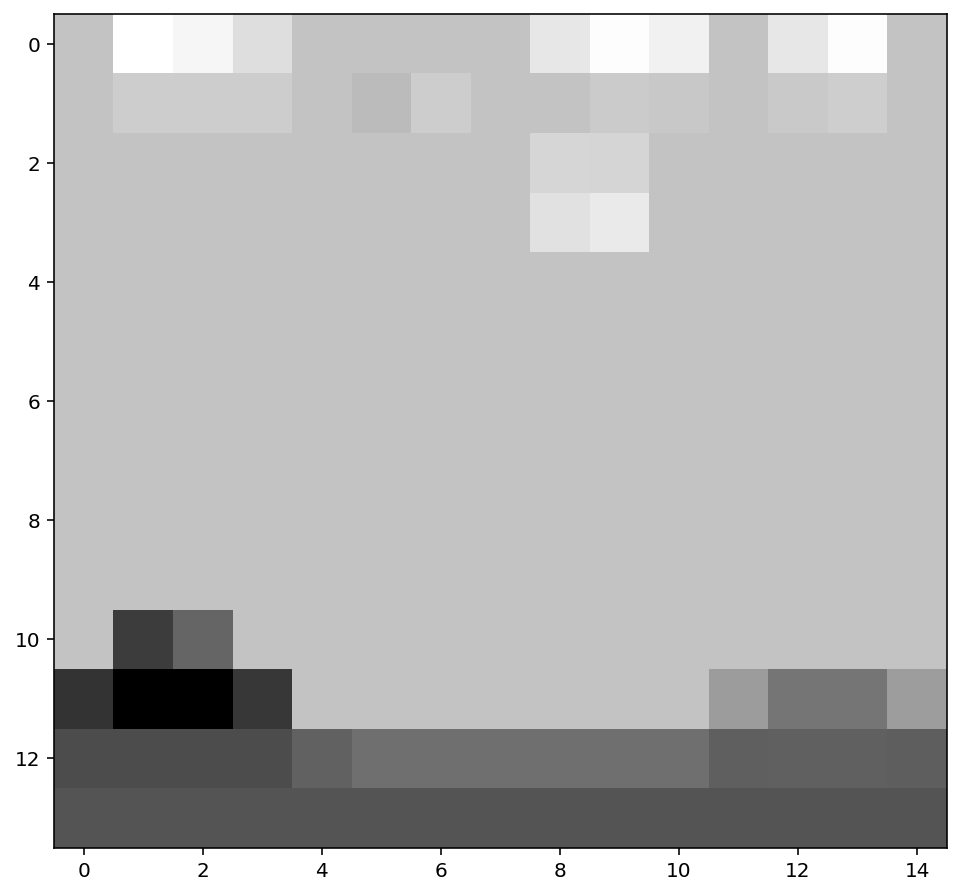

In [56]:
import torch.nn.functional as F

t = torch.tensor(f).unsqueeze(0).float()
image = t.permute(0, 3, 1, 2)

aa = torch.tensor(asymmetric).reshape(16, 16, 3).unsqueeze(0).permute(0, 3, 1, 2)
filter_ = torch.tensor(aa, dtype=torch.float)

filter_ = filter_ / 16 / 16 / 3 / 255

print(image.shape)
print(filter_.shape)
output = F.conv2d(input=image,
                  weight=filter_,
                  stride=16)

print("output:", output.shape)
print(output)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(output.reshape(-1, 14, 15)[0], cmap='gray')

In [401]:
from scipy import signal

a1 = asymmetric.reshape(16, 16, 3)[:, :, 0]

signal.convolve2d(f[:, :, 0], a1, ).shape

(239, 255)

In [97]:
asymmetric = np.array(range(5))
arr = np.array(range(25, 0, -1)).reshape(-1, 5)

arr * asymmetric

array([[ 0, 24, 46, 66, 84],
       [ 0, 19, 36, 51, 64],
       [ 0, 14, 26, 36, 44],
       [ 0,  9, 16, 21, 24],
       [ 0,  4,  6,  6,  4]])

In [32]:
225/15

15.0

In [ ]:
(224, 240, 3)

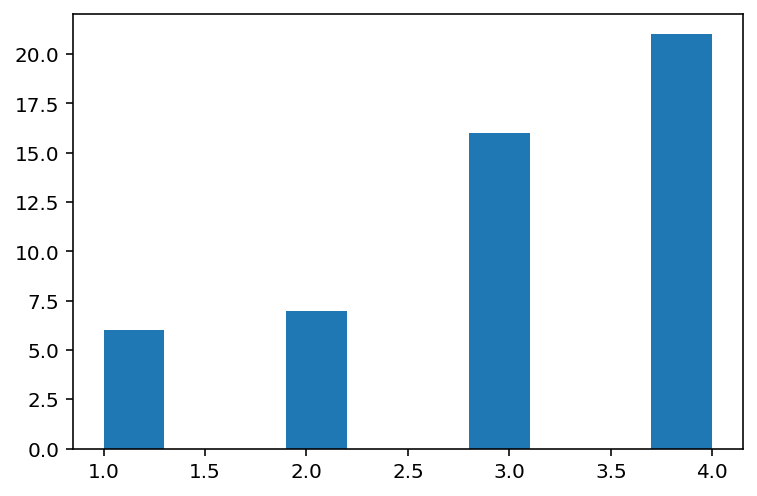

In [129]:
plt.hist(np.random.choice(range(5), 50, p=(np.arange(5)/np.arange(5).sum())));

<ipython-input-73-94229004db57>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  filter_ = torch.tensor(aa, dtype=torch.float)


225
210
0.7416103019600823
0.7416104


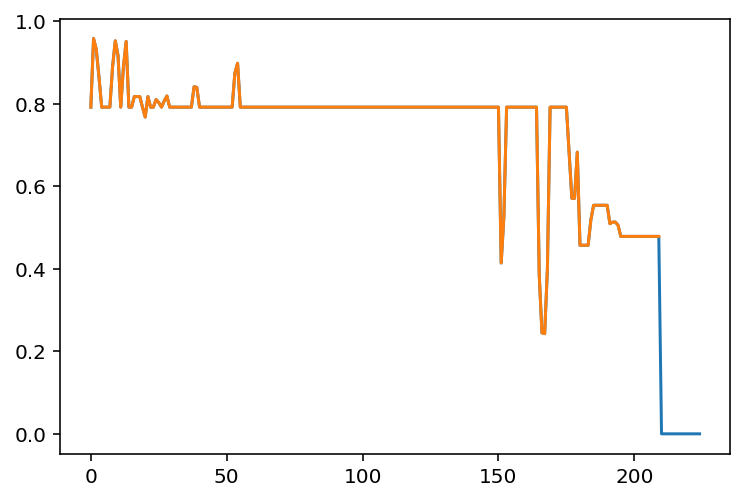

In [73]:
def blocks_identify(frame):
    obs = torch.tensor(frame)

    obs = torch.cat([obs,
                     torch.zeros(16, 240, 3)]).long()

    blocks = block_partition(obs, 16)

    # blocks = blocks[4*15:-2*15]

    asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3
    encodings_frame = [((block.flatten().float() @ asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks]

    return encodings_frame

aa = torch.tensor(asymmetric).reshape(16, 16, 3).unsqueeze(0).permute(0, 3, 1, 2)
filter_ = torch.tensor(aa, dtype=torch.float)
filter_ = filter_ / 16 / 16 / 3 / 255

#aa = aa.detach().copy()
def blocks_identify2(frame):
    # encodings_frame = (frame.reshape(-1, 16*16*3) * asymmetric / 16 / 16 / 3 / 255).sum(axis=1)
    import torch.nn.functional as F

    t = torch.tensor(frame).unsqueeze(0).float()
    image = t.permute(0, 3, 1, 2)

    output = F.conv2d(input=image,
                      weight=filter_,
                      stride=16)

    return output.flatten()

print(len(blocks_identify(f)))
print(len(blocks_identify2(f)))

print(np.mean(blocks_identify(f)[:-15]))
print(np.mean(blocks_identify2(f).numpy()))

#14.4ms %timeit blocks_identify(f)
#1.66ms %timeit blocks_identify2(f)
#648us %timeit blocks_identify2(f)

plt.plot(blocks_identify(f))
plt.plot(blocks_identify2(f));

In [196]:
%%time

obs = torch.tensor(f)

obs = torch.cat([obs,
                 torch.zeros(16, 240, 3)]).long()

blocks = block_partition(obs, 16)

blocks = blocks[4*15:-2*15]

blocks = blocks.numpy()

#17.0ms %timeit encodings_frame = [((block.flatten().float() @ asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks]
#15.4ms %timeit encodings_frame = [((block @ asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks.reshape(-1, 16*16*3)]
#17.2ms %timeit encodings_frame = [(block * asymmetric / 16 / 16 / 3 / 255).sum() for block in blocks.reshape(-1, 16*16*3)]
#1.05ms %timeit encodings_frame = (blocks.reshape(-1, 16*16*3) * asymmetric / 16 / 16 / 3 / 255).sum(axis=1)

# encodings_frame = [((block.flatten() @ asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks]

encodings_frame

CPU times: user 105 ms, sys: 5.28 ms, total: 111 ms
Wall time: 21.5 ms


array([0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79075896,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.5921421 ,
       0.74096772, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.67352341,
       0.52807299, 0.4176405 , 0.70635575, 0.79214863, 0.79214863,
       0.79214863, 0.79214863, 0.79214863, 0.79214863, 0.79214

---
### orch

In [11]:
import retro

def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)

    return matrix

class Environment2:
    def __init__(self):
        self.environment = retro.make(game='SuperMarioBros-Nes')

        self.blocks_seen = []
        self.blocks_seen_urls = []

        self.encodings = set()
        self.encodings_frame = set()

        # random_key = str(random.random())[2:]
        # self.image_files_folder = random_key
        # os.makedirs('/tmp/' + self.image_files_folder)

        self.frame = self.environment.reset()
        self.blocks_identify(self.frame)

    def step(self, action, commitment_interval):
        for _ in range(commitment_interval):
            self.frame, reward, is_done, information = self.environment.step(action)
        
        self.blocks_identify(self.frame)

        return self.frame, reward, is_done, information

    def close(self):
        self.environment.render(close=True)
        self.environment.close()

    # __del__ = close

    def blocks_identify(self, frame):
        obs = torch.tensor(frame)

        obs = torch.cat([obs,
                         torch.zeros(16, 240, 3)]).long()

        blocks = block_partition(obs, 16)

        blocks = blocks[4*15:-2*15]

        exponent = 2

        asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3
        # encodings = [((block.float() / 255 / 16 / 16).sum()**exponent).item() for block in blocks]
        # encodings = [hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in blocks]
        # encodings = [((block.flatten().float() @ asymmetric / 16 / 16 / 3 / 255) - 0.5).item() for block in blocks]
        encodings_frame = [((block.flatten().float() @ asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks]

        diffs = set(encodings_frame).difference(self.encodings)

        written = set()
        for encoding, block in zip(encodings_frame, blocks):
            if encoding in diffs and encoding not in written:
                written.add(encoding)

                # plt.imsave(f"/tmp/{self.image_files_folder}/{str(encoding)[2:]}.png", block.byte().numpy())
                # self.blocks_seen_urls.append(f"{self.image_files_folder}/{str(encoding)[2:]}.png")

        new_blocks = [block for encoding, block in zip(encodings_frame, blocks)
                            if encoding in diffs]

        new_blocks = set(tuple(block.flatten().tolist()) for block in new_blocks)
        new_blocks = [torch.tensor(block).reshape(16, 16, 3) for block in new_blocks]

        # update
        new_blocks = [block.tolist() for block in new_blocks]
        self.blocks_seen.extend(new_blocks)

        # if random.random() < 0.1:
        #     self.blocks_seen = sorted(self.blocks_seen, key=lambda x: tuple(torch.tensor(x).flatten().tolist()))

        self.encodings.update(diffs)
        self.encodings_frame = encodings_frame

    def interface_render(self):
        self.blocks_seen_urls = sorted(self.blocks_seen_urls)
        return self.frame.tolist(), list(self.encodings_frame), self.blocks_seen_urls


In [14]:
import retro

def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)

    return matrix

class Environment2_0:
    def __init__(self):
        self.environment = retro.make(game='SuperMarioBros-Nes')

        self.blocks_seen = []
        self.blocks_seen_urls = []

        self.encodings = set()
        self.encodings_frame = set()
        
        self.asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3

        self.frame = self.environment.reset()
        self.blocks_identify(self.frame)

    def step(self, action, commitment_interval):
        for _ in range(commitment_interval):
            self.frame, reward, is_done, information = self.environment.step(action)
        
        self.blocks_identify(self.frame)

        return self.frame, reward, is_done, information

    def close(self):
        self.environment.render(close=True)
        self.environment.close()

    # __del__ = close

    def blocks_identify(self, frame):
        obs = torch.tensor(frame)

        obs = torch.cat([obs,
                         torch.zeros(16, 240, 3)]).long()

        blocks = block_partition(obs, 16)

        blocks = blocks[4*15:-2*15]
        
        blocks = blocks.numpy()

        encodings_frame = [((block.flatten().float() @ self.asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks]
        # encodings_frame = [((block @ self.asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks.reshape(-1, 16*16*3)]
        # encodings_frame = [((block * self.asymmetric / 16 / 16 / 3 / 255)).item() for block in blocks.reshape(-1, 16*16*3)]
        # encodings_frame = blocks.reshape(-1, 16*16*3) * self.asymmetric
        # encodings_frame = (blocks.reshape(-1, 16*16*3) * self.asymmetric / 16 / 16 / 3 / 255).sum(axis=1)

        self.encodings.update(encodings_frame)
        
    def blocks_identify_all(self):
        return self.encodings

    def interface_render(self):
        self.blocks_seen_urls = sorted(self.blocks_seen_urls)
        return self.frame.tolist(), list(self.encodings_frame), self.blocks_seen_urls


In [3]:

import numpy as np
import random

def generate_play(step_count):
    environment = environment_make()
    environment.reset()
    
    for _ in range(step_count):
        # action = environment.action_space.sample()
        # action = list(actions.values())[np.random.randint(len(actions))]
        action = actions[random.randint(0, len(actions)-1)]

        for _ in range(6):
            frame, reward, is_done, information = environment.step(action)
            
            if information['lives'] == 1:
                return frame
            
    return frame


In [4]:
import retro

def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)

    return matrix

class Environment2:
    def __init__(self):
        self.environment = retro.make(game='SuperMarioBros-Nes')

        self.blocks_seen = []
        self.blocks_seen_urls = []
        
        self.frames_all = []

        self.encodings = set()
        self.encodings_frame = set()
        
        self.asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3

        self.frame = self.environment.reset()
        self.frames_all.append(self.frame)
        # self.blocks_identify(self.frame)

    def step(self, action, commitment_interval):
        for _ in range(commitment_interval):
            self.frame, reward, is_done, information = self.environment.step(action)
        
        # self.blocks_identify(self.frame)
        self.frames_all.append(self.frame)

        return self.frame, reward, is_done, information

    def close(self):
        self.environment.render(close=True)
        self.environment.close()

    # __del__ = close

    def blocks_identify_all(self):
        t = torch.tensor(np.stack(self.frames_all)).float()
        print(t.shape)
        images = t.permute(0, 3, 1, 2)

        asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3
        asymmetric = asymmetric.numpy()
        
        aa = torch.tensor(asymmetric).reshape(16, 16, 3).unsqueeze(0).permute(0, 3, 1, 2)
        filter_ = torch.tensor(aa, dtype=torch.float)
        filter_ = filter_ / 16 / 16 / 3 / 255

        output = F.conv2d(input=images,
                          weight=filter_,
                          stride=16)

        output = output[:, :, 3:-1]
        
        return output

    def interface_render(self):
        self.blocks_seen_urls = sorted(self.blocks_seen_urls)
        return self.frame.tolist(), list(self.encodings_frame), self.blocks_seen_urls


In [42]:
l.shape

torch.Size([101, 1, 10, 15])

In [5]:
actions_1 = [actions[random.randint(0, len(actions)-1)] for _ in range(10000)]

In [15]:
%%time

import numpy as np
import random

def generate_play(step_count, actions_given):
    environment = Environment2_0()
    # environment.reset()
    
    # for _ in range(step_count):
    for _, action in zip(range(step_count), actions_given):
        # action = actions[random.randint(0, len(actions)-1)]

        # for _ in range(6):
        frame, reward, is_done, information = environment.step(action, 6)

        if information['lives'] == 1:
            break
        
    environment.close()
    
    encodings = environment.blocks_identify_all()
            
    return encodings, frame


# %timeit (l, f) = generate_play(100, actions_given=actions_1)
(l, f) = generate_play(100, actions_given=actions_1)
len(l.unique()), f

RuntimeError: Cannot create multiple emulator instances per process, make sure to call env.close() on each environment before creating a new one

In [12]:
l

0

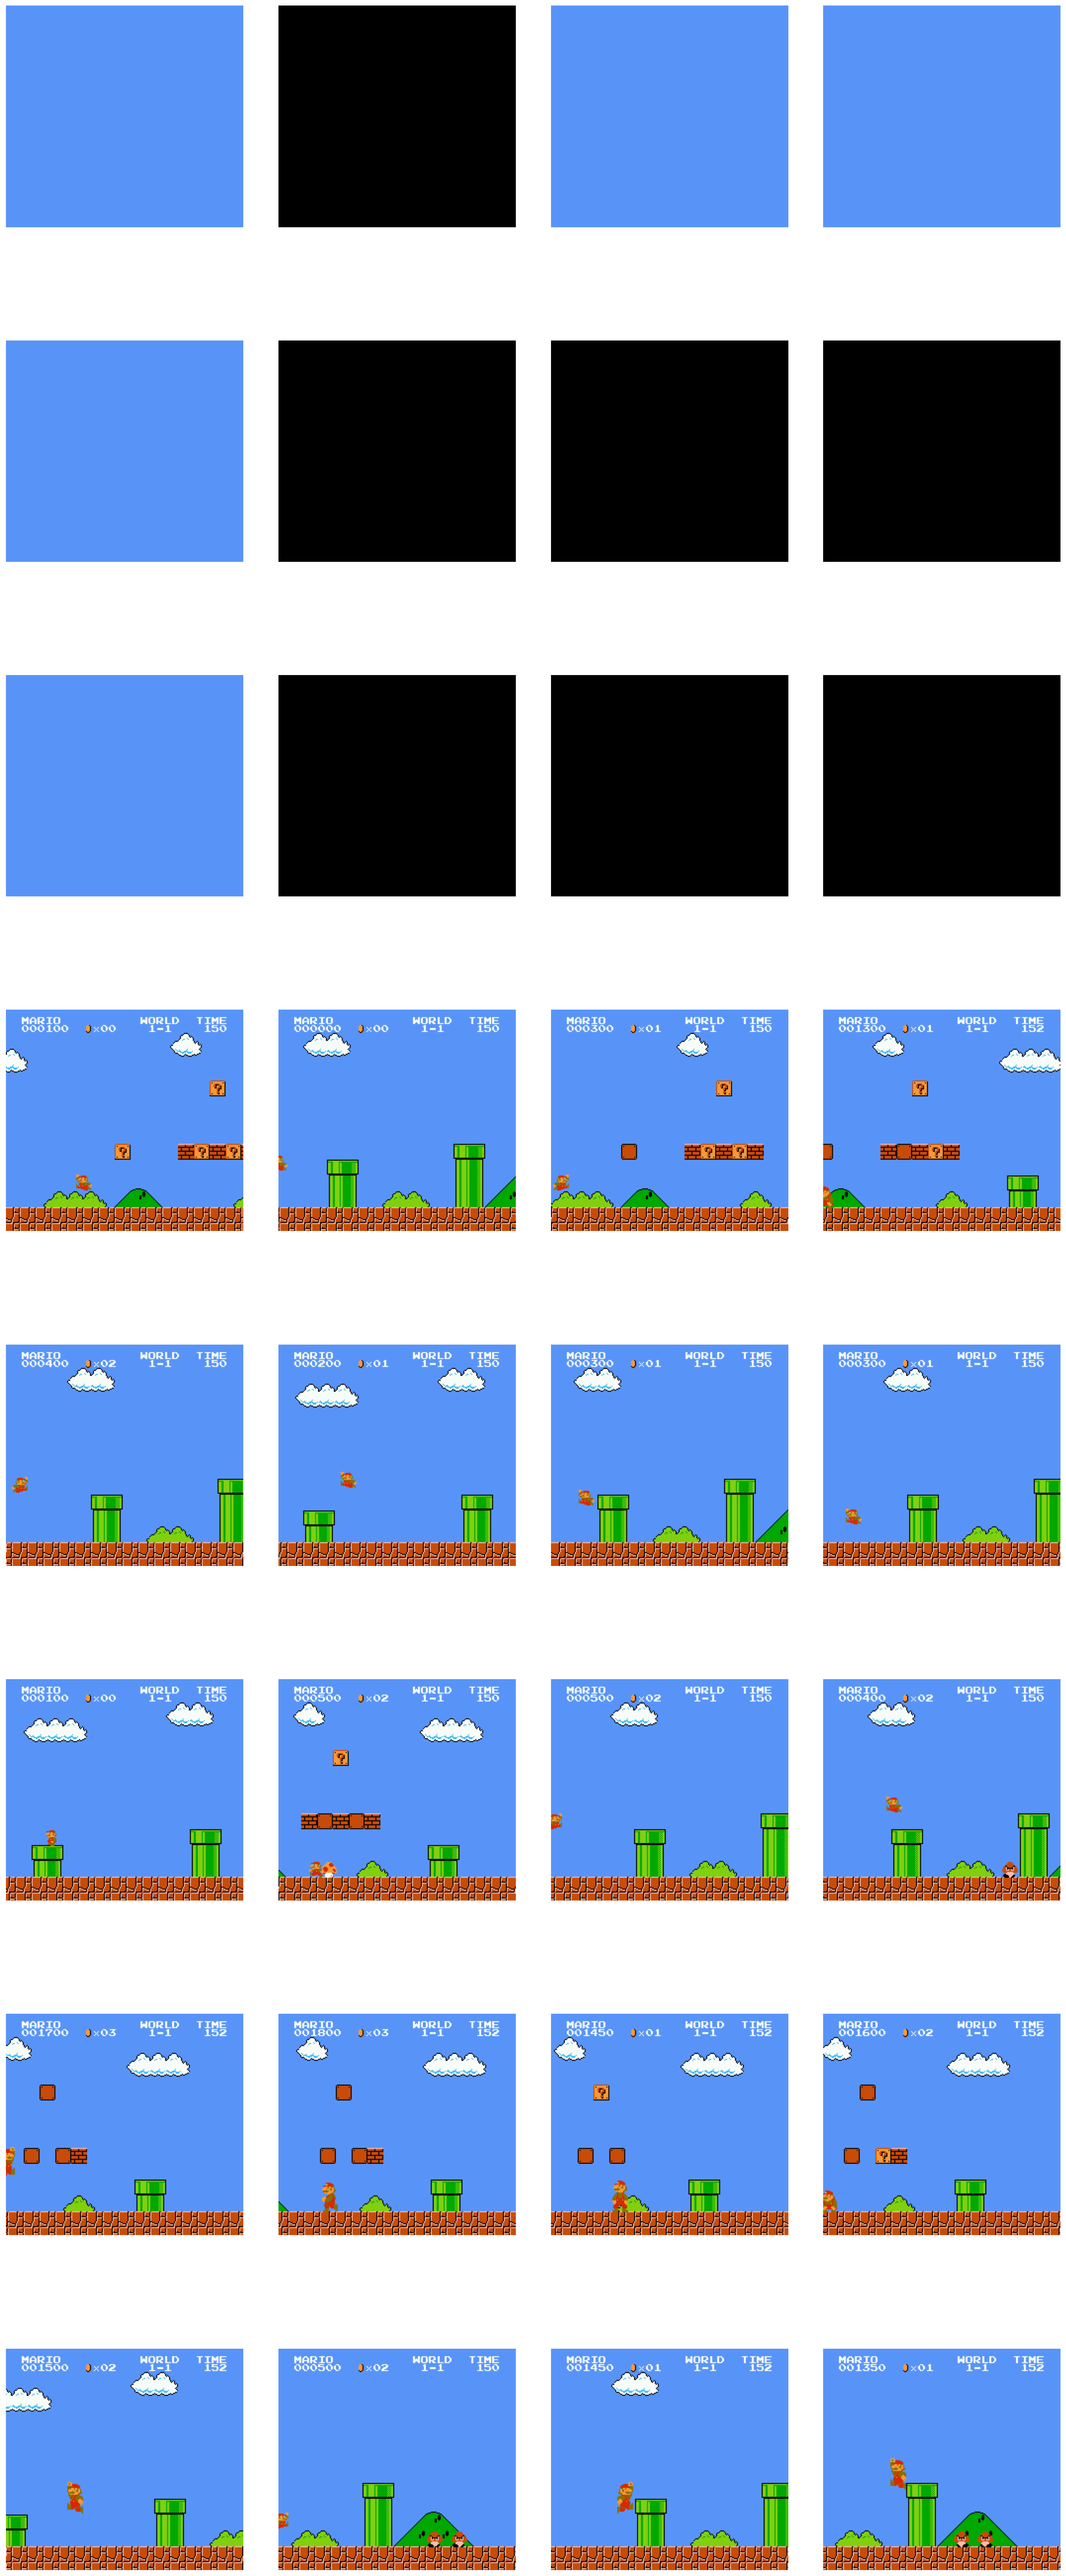

In [27]:

fig, axs = plt.subplots(8, 4, figsize=(18, 44))
axs = axs.flatten()
fig.tight_layout()

for ax, (l, frame) in zip(axs, frames):
    ax.imshow(frame)
    ax.axis('off')

In [25]:
frames = sorted(frames, key=lambda x: x[0])

In [24]:
frames = environments.collect()



TypeError: sorted expected 1 argument, got 2

In [ ]:
32x100 sparksort noblocksaccumulate innerfloat 5min21s
32x100 sparksort noblocksaccumulate broadcast  3min27s


CPU times: user 1.93 s, sys: 159 ms, total: 2.09 s
Wall time: 3min 27s


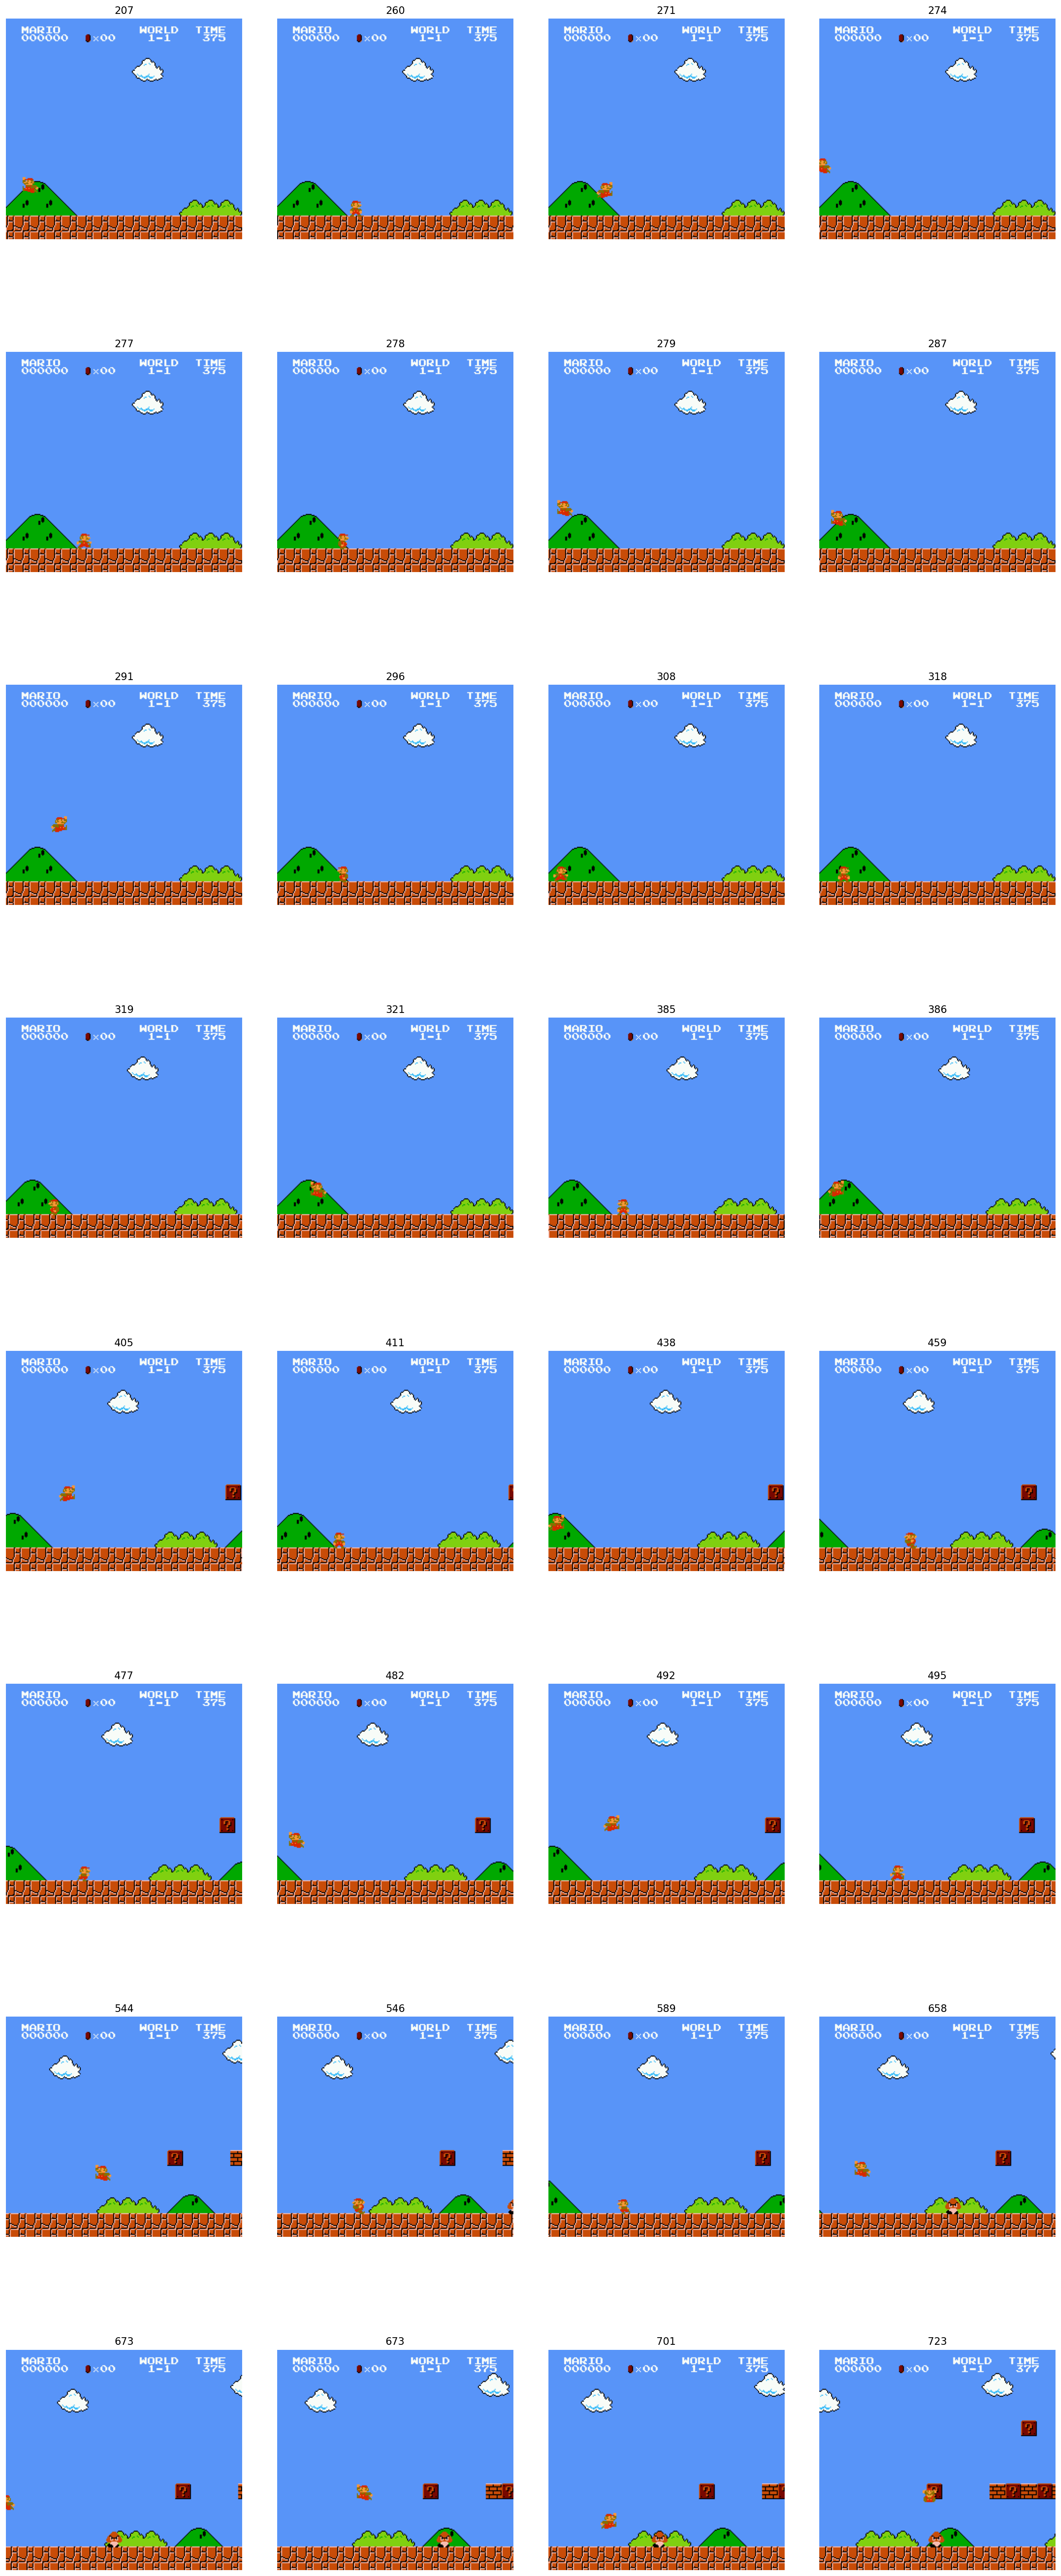

In [189]:
%%time

import matplotlib.pyplot as plt

environments = sc.parallelize(range(32)) .map (lambda x: generate_play(100))
ls_frames = environments.sortByKey().collect()
# frames = sorted(frames, lambda x: x[0])

# frames

fig, axs = plt.subplots(8, 4, figsize=(18, 44))
axs = axs.flatten()
fig.tight_layout()

for ax, (l, frame) in zip(axs, ls_frames):
    ax.imshow(frame)
    ax.axis('off')
    ax.set_title(l)

In [28]:
(frames[3] == frames[7]).sum()

161280

CPU times: user 2.17 s, sys: 499 ms, total: 2.67 s
Wall time: 43.6 s


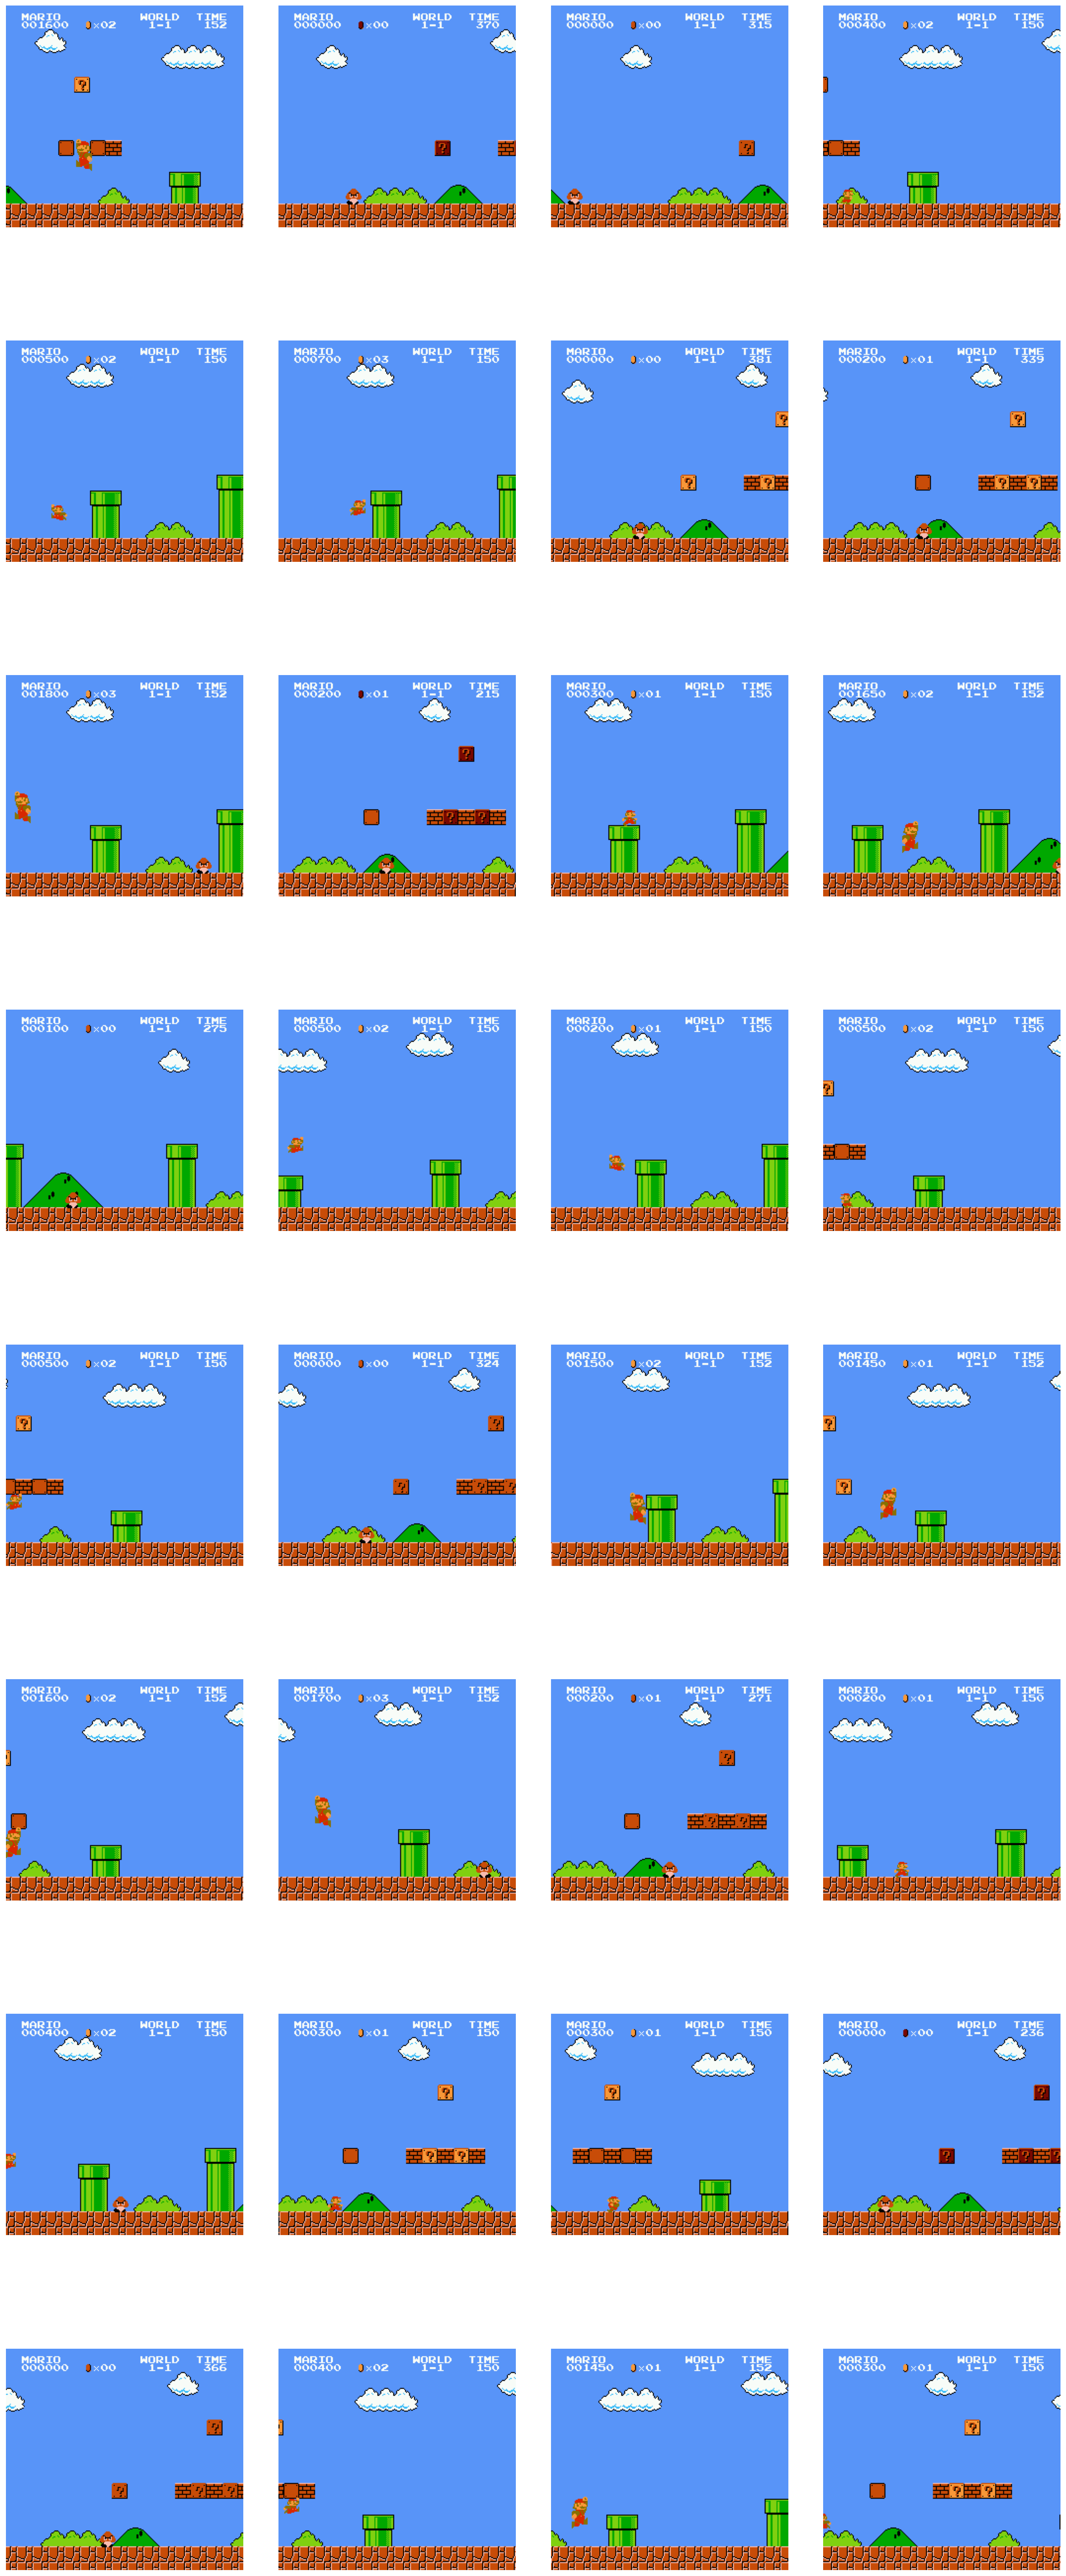

In [6]:
%%time

import matplotlib.pyplot as plt

environments = sc.parallelize(range(32)) .map (lambda x: generate_play(1000))
frames = environments.collect()

fig, axs = plt.subplots(8, 4, figsize=(18, 44))
axs = axs.flatten()
fig.tight_layout()

for ax, frame in zip(axs, frames):
    ax.imshow(frame)
    ax.axis('off')

In [ ]:
images = []
env.reset()

action = env.action_space.sample()

obs, rew, done, info = env.step(action)

In [ ]:
import json

def frame_draw(frame):
    height, width, colors = frame.shape
    frame_json = json.dumps(frame.tolist())
    
    return IPython.display.HTML("""
    <canvas id="myCanvas" width="%(width)s" height="%(height)s"></canvas>
    <script>
        c = document.getElementById("myCanvas");
        c.style.width = %(width)s*8/7 + 'px';
        c.style.height = %(width)s + 'px';
        
        var context = c.getContext("2d");
        context.scale(2, 2);
        
        frame = %(frame_json)s;
        height = frame.length;
        width = frame[0].length;

        for (var i = 0; i < width; i++) {
            for (var j = 0; j < height; j++) {
                context.beginPath();
                context.rect(i, j, 4, 4);
                context.fillStyle = 'rgb(' + frame[j][i].join(',') + ')';
                context.fill();
            }
        }
    </script>
    """ % {'frame_json': frame_json, 'width': 2*width, 'height': 2*height})
    
frame_draw(observation)

## ozx

In [ ]:
240 / 16, 224 / 16

In [ ]:
comps=[[0,1,3],[0,2,1],[0,2,3],[0,3,1],[0,3,2],[1,0,2],[1,0,3],[1,2,0],[1,2,3],[1,3,0],[1,3,2],[2,0,1],[2,0,3],[2,1,0],[2,1,3],[2,3,0],[2,3,1],[3,0,1],[3,0,2],[3,1,0],[3,1,2],[3,2,0],[3,2,1]]

torch.Size([14, 16, 16, 15, 3])
torch.Size([16, 15, 3])


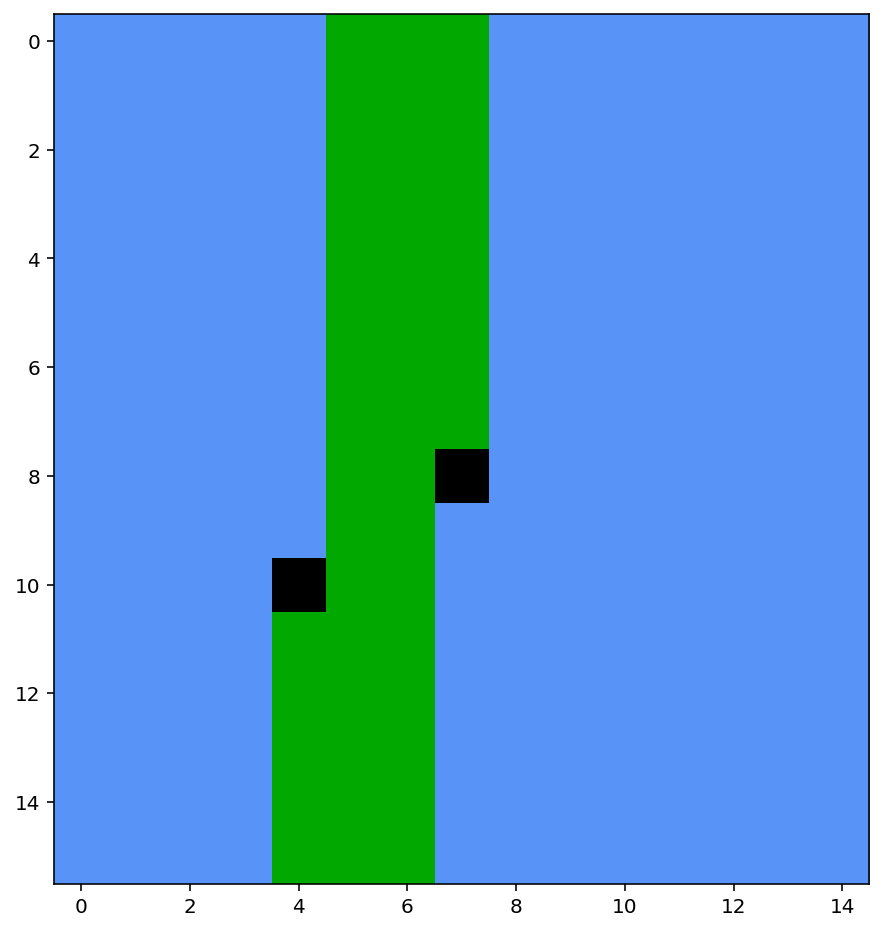

In [3]:
environment_make()
environment.reset()

action = environment.action_space.sample()

observation, rew, done, info = environment.step(action)

fig, ax = plt.subplots(figsize=(8, 8))

blocks = torch.tensor(observation).reshape(14, 15, 16, 16, 3).permute(0, 2, 3, 1, 4)
print(blocks.shape)
print(blocks[11][11].shape)
# print(blocks[11][11])
ax.imshow(blocks[11][11])


In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(torch.tensor(observation).reshape(-1, 224, 240, 3).permute(3, 1, 2, 0)[0]);
ax.axis('off');

In [ ]:
filters

In [ ]:
image

In [ ]:
filters = torch.randn(8,3,3,3)
inputs = torch.randn(1,3,1,2)
F.conv2d(image.float(), weight=filters, padding=1)

In [352]:
import torch.nn.functional as F

# image = torch.tensor(observation, dtype=float) #.reshape(-1, 3, 224, 240)
# print(image.shape)

t = torch.tensor(observation, dtype=float)
r, g, b = t[:,:,0], t[:,:,1], t[:,:,2]
image = torch.stack([r, g, b]).unsqueeze(0)
print("t", t.shape)


t = torch.tensor(observation, dtype=float).unsqueeze(0)
# r, g, b = t.permute(0, 3, 1, 2)
# image = torch.stack([r, g, b]).unsqueeze(0)
image = t.permute(0, 3, 1, 2)
print("t", t.shape)



filter_ = torch.tensor([[
    [[1, 1], [1, 1]],
    [[1, 1], [1, 1]],
    [[1, 1], [1, 1]]
]], dtype=float)

filter_ = filter_ / 4
filter_[0,0] = 0
filter_[0,1] = 0
filter_[0,2] = 1
print(filter_)
print(filter_.shape)
output = F.conv2d(input=image,
                  weight=filter_,
                  stride=2)

print("output:", output.shape)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(output.reshape(-1, 112, 120, 1)[0], cmap='gray')

NameError: name 'observation' is not defined

In [ ]:
224*240, 224*240/16/16/15

In [ ]:
torch.ones(4, 4)

In [ ]:
588*16*16,224*240

In [ ]:
def block_partition(matrix, block_width):
    total_width = matrix.shape[0]
    
    matrix = matrix.reshape(-1, block_width, total_width // block_width, block_width)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width)
    
    return matrix

t = torch.tensor(observation)
r, g, b = t.permute(2, 0, 1)
t= t.permute(2, 0, 1)

print(r.shape)

r = block_partition(r[:224,:224], 16)
print(r.shape)

r = r[-40]
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(r);

In [ ]:

t = torch.tensor(observation) #.unsqueeze(0)
# r, g, b = t.permute(0, 3, 1, 2)[0]
print("t", t.shape)
print("r", r.shape)

r = t
r = r.reshape(14, 15, 16, 16, 3)
r = r.permute(0, 1, 3, 2, 4)
r = r[-4][-7]

print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(r)

In [ ]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

print(t.shape)

t = block_partition(t[:224,:224], 16)
print(t.shape)

# t = t[-40]
r = t[-40]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(r);

exponent = 1

# [hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in t]

In [2]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

print(t.shape)

t = block_partition(t[:224,:224], 16)
print(t.shape)

# t = t[-40]
r = t[-40]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(r);

exponent = 1

k = set([tuple(block.flatten().tolist()) for block in t])
# k = sorted(list(k))
blocks = [torch.tensor(block).reshape(16, 16, 3) for block in k]

print(len(set([hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in t])))
print(len(blocks))
ax.imshow(blocks[-5])

NameError: name 'observation' is not defined

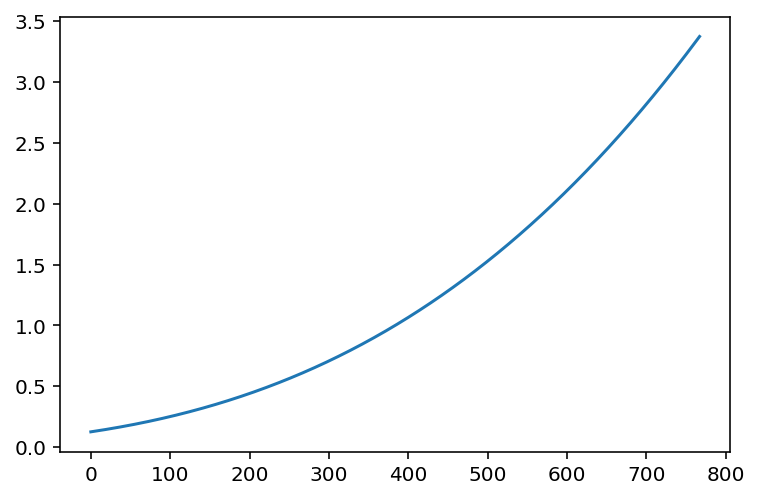

In [41]:
a1 = torch.linspace(0.5, 1.5, 16*16*3)**3

plt.plot(a1)

torch.Size([224, 240, 3])
torch.Size([196, 16, 16, 3])
torch.Size([16, 16, 3])
[0.7921485304832458, 0.9586583971977234, 0.9322603940963745, 0.8646268844604492, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.8901470899581909, 0.9529489874839783, 0.917827844619751, 0.7921485304832458, 0.8898940682411194, 0.9515265822410583, 0.7921485304832458, 0.8178447484970093, 0.8178447484970093, 0.8178447484970093, 0.7921485304832458, 0.782853901386261, 0.8178447484970093, 0.7921485304832458, 0.7921485304832458, 0.810614824295044, 0.8033480644226074, 0.7921485304832458, 0.8063144683837891, 0.8178447484970093, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.8417813777923584, 0.8400060534477234, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7

AttributeError: 'float' object has no attribute 'tolist'

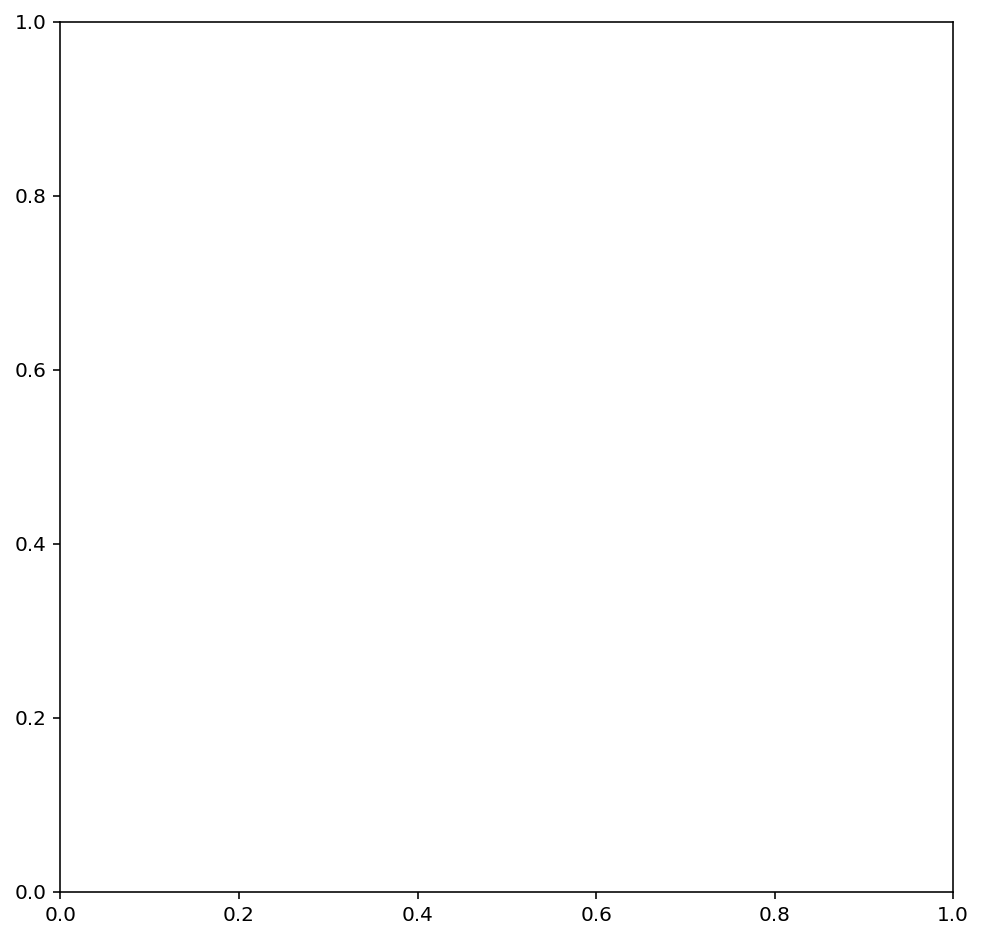

In [175]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

print(t.shape)

t = block_partition(t[:224,:224], 16)
print(t.shape)

# t = t[-40]
r = t[-40]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(r);

exponent = 1

asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3

k = [((block.flatten().float() @ asymmetric / 16 / 16 / 3 / 255)).item() for block in t]
print(k)
k = set(tuple(block.tolist()) for block in k)
blocks = [torch.tensor(block).reshape(16, 16, 3) for block in k]

len(blocks)

In [64]:
t[0].flatten().float() @ asymmetric

tensor(155134.3750)

In [94]:
torch.chunk()

TypeError: chunk() missing 2 required positional argument: "input", "chunks"

In [90]:
torch.

['AVG',
 'AggregationType',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CONV_BN_FUSION',
 'CallStack',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'CudaBFloat16StorageBase',
 'CudaBoolStorageBase',
 'CudaByteStorageBase',
 'CudaCharStorageBase',
 'CudaComplexDoubleStorageBase',
 'CudaComplexFloatStorageBase',
 'CudaDoubleStorageBase',
 'CudaFloatStorageBase',
 'CudaHalfStorageBase',
 'CudaIntStorageBase',
 'CudaLongStorageBase',
 'CudaShortStorageBase',
 'DeepCopyMemoTable',
 'DeviceObjType',
 'DictType',
 'DoubleStorage',
 'DoubleTensor',
 'ErrorReport',
 'ExecutionPlan',
 'ExtraFilesMap',
 'FatalError',
 'FileCheck',
 'FloatStorage',

In [123]:
tensor.unsqueeze(0).shape

torch.Size([1, 224, 240, 3])

In [158]:
import torch.nn.functional as F

tensor = torch.tensor(observation)

print(tensor.shape)
tensor = tensor.unsqueeze(0)
print(tensor.shape)

unf1 = F.unfold(input=tensor.float(),
                kernel_size=(4, 4),
                stride=3)

plt.imshow(unf1[0])

torch.Size([224, 240, 3])
torch.Size([1, 224, 240, 3])


RuntimeError: Given input with spatial size (240, 240), kernel_size=(4, 4), dilation=(1, 1), padding=(0, 0), calculated shape of the array of sliding blocks as (79, 0), which is too small (non-positive).

torch.Size([240, 240, 3])
torch.Size([225, 16, 16, 3])
torch.Size([16, 16, 3])
35
36


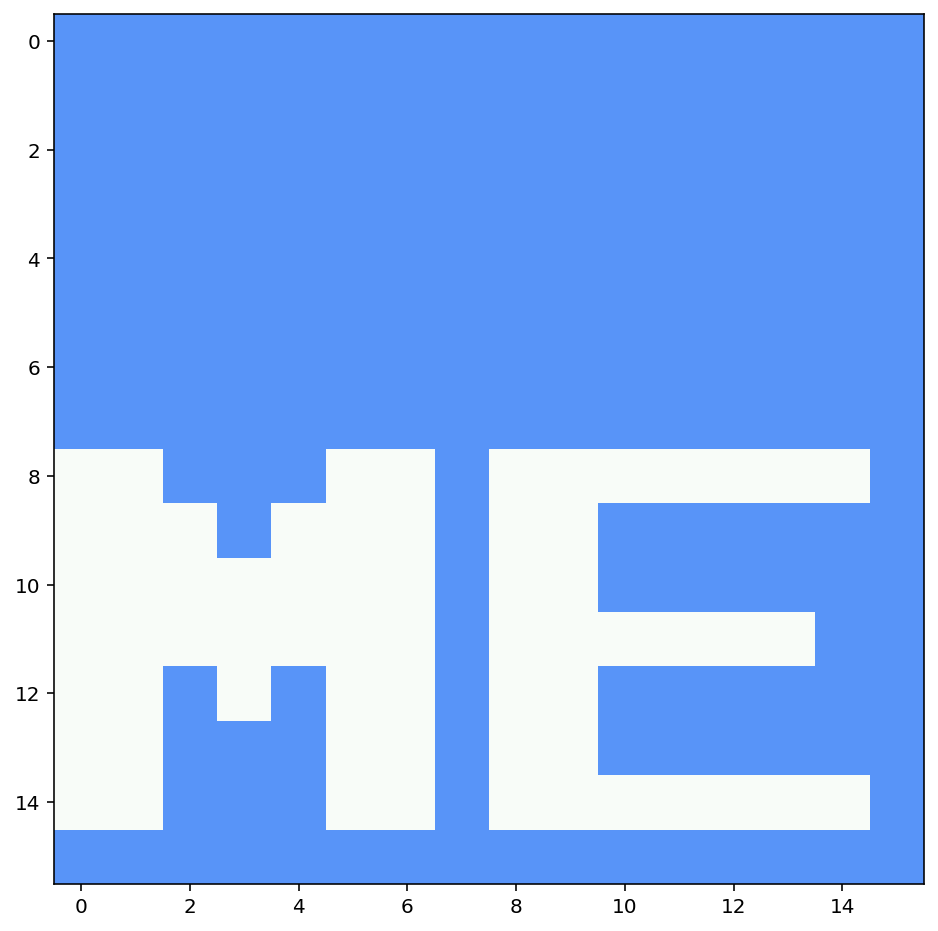

In [4]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

t = torch.cat([
    torch.tensor(observation),
    torch.zeros(16, 240, 3)
]).long()

print(t.shape)

t = block_partition(t, 16)
print(t.shape)

r = t[-212]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(r);

exponent = 1

k = set([tuple(block.flatten().tolist()) for block in t])
# k = sorted(list(k))
blocks = [torch.tensor(block).reshape(16, 16, 3) for block in k]

print(len(set([hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in t])))
print(len(blocks))
ax.imshow(r)

In [13]:
r;

In [12]:
PIL.Image.fromarray?

In [29]:
import PIL.Image

PIL.Image.fromarray(r.byte().numpy())

In [27]:
plt.imsave('/workfolder/toast.png', r.byte().numpy())

In [28]:
!open /workfolder/toast.png

/usr/bin/sh: 1: open: not found
